# SENTIMENT ANALYSIS ON UNITED STATES POLITICS ( From March 2021 till April 2021)

In [250]:
#  Combining Multiple CSV and Filtering in Code
#  Feature Enginnering of the Dataset
#  Filtering Tweets-> Removing Retweets, Htpps, other unnecessiary in tweets
#  NLP for the Tweets (Stopwords,Stemming, Lemmatizer, Tfidf)
#  Using VADER Sentiment Analyser Tool to find the sentiment of each tweets for (validation purpose).
#  Model Building
#  predicting the Model and Comparing with (VADER)
#  Virtualization.

# Hashtag created on the topic of TRUMP, OBAMA, BERNIE DANDERS, HILLARY CLINTON

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time

In [252]:
#Path for Dataset
import os
import glob # Make a folder and place all the csv file and take Folder path.
os.chdir("C:/Users/user/PycharmProjects/Twitter _tweets_fetching/tweets_csv") # Folder Path

In [253]:
# Searching for the CSV extension in the particular directory 
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [254]:
#combine all CSV files in the list # Since dataset is very large and Raw, refining has not done and will be done in code.
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

C:\Users\user\anaconda3\envs\MLEnv\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (0,1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,23,24,25,26,27,28,35,36,37,39,40,41,43,44,45,46,51,57,58,60,70,71,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,

In [255]:
#combined_csv=pd.read_csv("C:/Users/user/PycharmProjects/Twitter _tweets_fetching/tweets_csv/tweets3.csv")

# FEATURE ENGINEERING

In [256]:
combined_csv

,"{""created_at"":""Wed Mar 03 15:37:42 +0000 2021""",id:1367137111569272838,"id_str:""1367137111569272838""","text:""ofc liberals are on the opposite side of that same coin","generating similar thoughts with the opposite assumptions;\u2026 https:\/\/t.co\/BgChjo35ps""","source:""\u003ca href=\""http:\/\/twitter.com\/download\/iphone\"" rel=\""nofollow\""\u003eTwitter for iPhone\u003c\/a\u003e""",truncated:true,in_reply_to_status_id:1367137110436831235,"in_reply_to_status_id_str:""1367137110436831235""",in_reply_to_user_id:187562097,...,"entities:{""hashtags"":[].3","urls:[{""url"":""https:\/\/t.co\/HRHvpA32yv""","expanded_url:""https:\/\/twitter.com\/i\/web\/status\/1385633025933807616""","display_url:""twitter.com\/i\/web\/status\/1\u2026"".1",user_mentions:[].3,symbols:[]}.1,favorited:false.1,retweeted:false.1,"filter_level:""low"".1","timestamp_ms:""1619195631856""}"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{""created_at"":""Wed Mar 03 15:37:43 +0000 2021""",id:1367137117072224259,"id_str:""1367137117072224259""","text:""RT @BillKristol: From 9\/11 truthers to ...","source:""\u003ca href=\""https:\/\/mobile.twitte...",truncated:false,in_reply_to_status_id:null,in_reply_to_status_id_str:null,in_reply_to_user_id:null,in_reply_to_user_id_str:null,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{""created_at"":""Wed Mar 03 15:37:49 +0000 2021""",id:1367137141713739784,"id_str:""1367137141713739784""","text:""Bernie Sanders reveals that the family f...","source:""\u003ca href=\""https:\/\/cheapbotsdone...","Done Quick!\u003c\/a\u003e""",truncated:false,in_reply_to_status_id:null,in_reply_to_status_id_str:null,in_reply_to_user_id:null,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4199,NaN,NaN,NaN,NaN,NaN,000 drones in his 8-year presidency. Backed co...,Paraguay,NaN,NaN,NaN,...,statuses_count:868879,"created_at:""Thu Mar 22 18:15:18 +0000 2007""",utc_offset:null,time_zone:null,contributors_enabled:false,is_translator:false,"profile_background_color:""9AE4E8""","profile_background_image_url:""http:\/\/abs.twi...","profile_background_image_url_https:""https:\/\/...","profile_link_color:""FF0021"""
4200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4201,NaN,NaN,NaN,NaN,NaN,display_text_range:[12,101],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [257]:
list(combined_csv.columns.values.tolist())

['{"created_at":"Wed Mar 03 15:37:42 +0000 2021"',
 'id:1367137111569272838',
 'id_str:"1367137111569272838"',
 'text:"ofc liberals are on the opposite side of that same coin',
 ' generating similar thoughts with the opposite assumptions;\\u2026 https:\\/\\/t.co\\/BgChjo35ps"',
 'source:"\\u003ca href=\\"http:\\/\\/twitter.com\\/download\\/iphone\\" rel=\\"nofollow\\"\\u003eTwitter for iPhone\\u003c\\/a\\u003e"',
 'truncated:true',
 'in_reply_to_status_id:1367137110436831235',
 'in_reply_to_status_id_str:"1367137110436831235"',
 'in_reply_to_user_id:187562097',
 'in_reply_to_user_id_str:"187562097"',
 'in_reply_to_screen_name:"lookoutitsbbear"',
 'user:{"id":187562097',
 'id_str:"187562097"',
 'name:"the wizard of daggorath"',
 'screen_name:"lookoutitsbbear"',
 'location:"\\ud835\\uddc1\\ud835\\uddbe\\ud835\\uddba\\ud835\\uddcb\\ud835\\uddcd \\ud835\\uddc8\\ud835\\uddbf \\ud835\\uddcd\\ud835\\uddc1\\ud835\\uddbe \\ud835\\uddd0\\ud835\\uddc8rld"',
 'url:"http:\\/\\/benjaminbear.bandcamp

In [258]:
combined_csv.drop(combined_csv.iloc[:, 4:911], inplace = True, axis = 1)

In [259]:
combined_csv

,"{""created_at"":""Wed Mar 03 15:37:42 +0000 2021""",id:1367137111569272838,"id_str:""1367137111569272838""","text:""ofc liberals are on the opposite side of that same coin"
0,NaN,NaN,NaN,NaN
1,"{""created_at"":""Wed Mar 03 15:37:43 +0000 2021""",id:1367137117072224259,"id_str:""1367137117072224259""","text:""RT @BillKristol: From 9\/11 truthers to ..."
2,NaN,NaN,NaN,NaN
3,"{""created_at"":""Wed Mar 03 15:37:49 +0000 2021""",id:1367137141713739784,"id_str:""1367137141713739784""","text:""Bernie Sanders reveals that the family f..."
4,NaN,NaN,NaN,NaN
...,...,...,...,...
4199,NaN,NaN,NaN,NaN
4200,NaN,NaN,NaN,NaN
4201,NaN,NaN,NaN,NaN
4202,NaN,NaN,NaN,NaN


In [260]:
combined_csv.dropna(inplace= True)

In [261]:
#combined_csv.rename(columns={'date_created': 'id-1', 'id-2': 'tweets'}, inplace=True)

In [262]:
combined_csv.dropna()

,"{""created_at"":""Wed Mar 03 15:37:42 +0000 2021""",id:1367137111569272838,"id_str:""1367137111569272838""","text:""ofc liberals are on the opposite side of that same coin"
1,"{""created_at"":""Wed Mar 03 15:37:43 +0000 2021""",id:1367137117072224259,"id_str:""1367137117072224259""","text:""RT @BillKristol: From 9\/11 truthers to ..."
3,"{""created_at"":""Wed Mar 03 15:37:49 +0000 2021""",id:1367137141713739784,"id_str:""1367137141713739784""","text:""Bernie Sanders reveals that the family f..."
5,"{""created_at"":""Wed Mar 03 15:37:50 +0000 2021""",id:1367137146545582087,"id_str:""1367137146545582087""","text:""RT @RichardGrenell: Albin Kurti was agai..."
7,"{""created_at"":""Wed Mar 03 15:37:52 +0000 2021""",id:1367137154938331136,"id_str:""1367137154938331136""","text:""TRUE TRUE TRUE"""
9,"{""created_at"":""Wed Mar 03 15:37:53 +0000 2021""",id:1367137157740167173,"id_str:""1367137157740167173""","text:""RT @RonColeman: @paddua @drsimonegold Th..."
...,...,...,...,...
563,"{""created_at"":""Wed Mar 03 15:46:08 +0000 2021""",id:1367139235871023105,"id_str:""1367139235871023105""","text:""RT @covie_93: You know what would be funny"
565,"{""created_at"":""Wed Mar 03 15:46:09 +0000 2021""",id:1367139239788478468,"id_str:""1367139239788478468""","text:""RT @Clarknt67: #BlueMAGA celebrating the..."
567,"{""created_at"":""Wed Mar 03 15:46:09 +0000 2021""",id:1367139239943618561,"id_str:""1367139239943618561""","text:""@DonaldJTrumpJr Barack Hussein Obama &am..."
569,"{""created_at"":""Wed Mar 03 15:46:11 +0000 2021""",id:1367139249091350532,"id_str:""1367139249091350532""","text:""RT @ILovesMyUSA: \u203c\ufe0fFor 8 YEARS"


In [263]:
combined_csv[:2]

,"{""created_at"":""Wed Mar 03 15:37:42 +0000 2021""",id:1367137111569272838,"id_str:""1367137111569272838""","text:""ofc liberals are on the opposite side of that same coin"
1,"{""created_at"":""Wed Mar 03 15:37:43 +0000 2021""",id:1367137117072224259,"id_str:""1367137117072224259""","text:""RT @BillKristol: From 9\/11 truthers to ..."
3,"{""created_at"":""Wed Mar 03 15:37:49 +0000 2021""",id:1367137141713739784,"id_str:""1367137141713739784""","text:""Bernie Sanders reveals that the family f..."


In [264]:
combined_csv.drop(combined_csv.columns[2], axis = 1, inplace = True)

In [265]:
combined_csv[:2]

,"{""created_at"":""Wed Mar 03 15:37:42 +0000 2021""",id:1367137111569272838,"text:""ofc liberals are on the opposite side of that same coin"
1,"{""created_at"":""Wed Mar 03 15:37:43 +0000 2021""",id:1367137117072224259,"text:""RT @BillKristol: From 9\/11 truthers to ..."
3,"{""created_at"":""Wed Mar 03 15:37:49 +0000 2021""",id:1367137141713739784,"text:""Bernie Sanders reveals that the family f..."


In [266]:
list(combined_csv.columns)

['{"created_at":"Wed Mar 03 15:37:42 +0000 2021"',
 'id:1367137111569272838',
 'text:"ofc liberals are on the opposite side of that same coin']

In [267]:
combined_csv1 = combined_csv.rename(columns = { '{"created_at":"Wed Mar 03 15:37:42 +0000 2021"':"Date","id:1367137111569272838":"Id",'text:"ofc liberals are on the opposite side of that same coin':"Tweets"})

In [268]:
combined_csv1[:2]

,Date,Id,Tweets
1,"{""created_at"":""Wed Mar 03 15:37:43 +0000 2021""",id:1367137117072224259,"text:""RT @BillKristol: From 9\/11 truthers to ..."
3,"{""created_at"":""Wed Mar 03 15:37:49 +0000 2021""",id:1367137141713739784,"text:""Bernie Sanders reveals that the family f..."


In [269]:
combined_csv1['Tweets']

1      text:"RT @BillKristol: From 9\/11 truthers to ...
3      text:"Bernie Sanders reveals that the family f...
5      text:"RT @RichardGrenell: Albin Kurti was agai...
7                                  text:"TRUE TRUE TRUE"
9      text:"RT @RonColeman: @paddua @drsimonegold Th...
                             ...                        
563     text:"RT @covie_93: You know what would be funny
565    text:"RT @Clarknt67: #BlueMAGA celebrating the...
567    text:"@DonaldJTrumpJr Barack Hussein Obama &am...
569       text:"RT @ILovesMyUSA: \u203c\ufe0fFor 8 YEARS
571    text:"RT @RichardGrenell: Albin Kurti was agai...
Name: Tweets, Length: 3432, dtype: object

In [270]:
combined_csv1[combined_csv1['Tweets'].str.contains( 'text:"RT')]

,Date,Id,Tweets
1,"{""created_at"":""Wed Mar 03 15:37:43 +0000 2021""",id:1367137117072224259,"text:""RT @BillKristol: From 9\/11 truthers to ..."
5,"{""created_at"":""Wed Mar 03 15:37:50 +0000 2021""",id:1367137146545582087,"text:""RT @RichardGrenell: Albin Kurti was agai..."
9,"{""created_at"":""Wed Mar 03 15:37:53 +0000 2021""",id:1367137157740167173,"text:""RT @RonColeman: @paddua @drsimonegold Th..."
11,"{""created_at"":""Wed Mar 03 15:37:54 +0000 2021""",id:1367137164677566470,"text:""RT @RichardGrenell: Albin Kurti was agai..."
21,"{""created_at"":""Wed Mar 03 15:38:08 +0000 2021""",id:1367137221610995716,"text:""RT @maxthegirl: It wasn't about the mean..."
...,...,...,...
561,"{""created_at"":""Wed Mar 03 15:46:08 +0000 2021""",id:1367139235594125316,"text:""RT @ggreenwald: Democrats now launching ..."
563,"{""created_at"":""Wed Mar 03 15:46:08 +0000 2021""",id:1367139235871023105,"text:""RT @covie_93: You know what would be funny"
565,"{""created_at"":""Wed Mar 03 15:46:09 +0000 2021""",id:1367139239788478468,"text:""RT @Clarknt67: #BlueMAGA celebrating the..."
569,"{""created_at"":""Wed Mar 03 15:46:11 +0000 2021""",id:1367139249091350532,"text:""RT @ILovesMyUSA: \u203c\ufe0fFor 8 YEARS"


In [271]:
# Removing retweets this can also be done during the fectching of data from twitter 

In [272]:
# search for particular key word in the Tweets column (Text: "RT)--> WHICH IS THE RETWEETS and create a new Colum with are they exist (True/False)
searchfor = '.*text:"RT*.'
combined_csv1["TrueFalse"]=combined_csv1['Tweets'].str.contains(searchfor, regex=True)

In [273]:
#combined_csv1[combined_csv1.apply(lambda row: row.astype(str).str.contains('text:"RT').any(), axis=1)].shape

In [274]:
#combined_csv1[combined_csv1.apply(lambda row: row.astype(str).str.contains('text:"RT').any(), axis=1)].drop

In [275]:
combined_csv1[:2] # now only tweets present in the data.

,Date,Id,Tweets,TrueFalse
1,"{""created_at"":""Wed Mar 03 15:37:43 +0000 2021""",id:1367137117072224259,"text:""RT @BillKristol: From 9\/11 truthers to ...",True
3,"{""created_at"":""Wed Mar 03 15:37:49 +0000 2021""",id:1367137141713739784,"text:""Bernie Sanders reveals that the family f...",False


In [276]:
 combined_csv2= combined_csv1[~combined_csv1['TrueFalse'].isin(['True'])]

In [277]:
discard=["True"]
combined_csv2=combined_csv2[~combined_csv2.TrueFalse.apply(str).str.contains('True'.join(discard))]
# https://www.statology.org/pandas-drop-rows-that-contain-string/

In [278]:
combined_csv2[:2]

,Date,Id,Tweets,TrueFalse
3,"{""created_at"":""Wed Mar 03 15:37:49 +0000 2021""",id:1367137141713739784,"text:""Bernie Sanders reveals that the family f...",False
7,"{""created_at"":""Wed Mar 03 15:37:52 +0000 2021""",id:1367137154938331136,"text:""TRUE TRUE TRUE""",False


In [279]:
#pip install textblob

In [280]:

#pip install vaderSentiment

# Cleaning of Tweets

In [374]:
#cleaning the tweets
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt

def cleaning_tweets(tweets):
    # remove twitter Return handles (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    
    # remove twitter handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
    # remove URL links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https|http?://\\/\\/[A-Za-z0-9./]*")
    
    # remove special characters, numbers, punctuations (except for #)
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")
    
    #remove extra char in the date
    #tweets =np.vectorize(remove_pattern)(tweets, '{"created_at'," ")
    
    return tweets
cleaning = lambda a: cleaning_tweets(a)

In [284]:
combined_csv2['Tweets']= pd.DataFrame(combined_csv2.Tweets.apply(cleaning))
combined_csv2['Tweets'].head(2)
combined_csv2.shape

(972, 4)

# VADER SENTIMENT ANALYSIS
#https://www.analyticsvidhya.com/blog/2021/01/sentiment-analysis-vader-or-textblob/

In [285]:
# Finding Polarity of each tweets in Positve, negative, neutral, compound.

In [286]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [287]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [288]:
vader.polarity_scores("I happy but bit sad.")


{'neg': 0.437, 'neu': 0.316, 'pos': 0.247, 'compound': -0.4215}

In [289]:
vader.polarity_scores("I happy.")

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

In [290]:
combined_csv2['Vader_scores'] = combined_csv2['Tweets'].apply(lambda Tweets: vader.polarity_scores(Tweets))

In [291]:
combined_csv2['compound']  = combined_csv2['Vader_scores'].apply(lambda score_dict: score_dict['compound'])

In [292]:
combined_csv2['Sentiment']=''
combined_csv2.loc[combined_csv2.compound>0,'Sentiment']='Positive'
combined_csv2.loc[combined_csv2.compound ==0,'Sentiment']='Neutral'
combined_csv2.loc[combined_csv2.compound<0,'Sentiment']='Negative'

In [293]:
combined_csv2

,Date,Id,Tweets,TrueFalse,Vader_scores,compound,Sentiment
3,"{""created_at"":""Wed Mar 03 15:37:49 +0000 2021""",id:1367137141713739784,"text:""Bernie Sanders reveals that the family f...",False,"{'neg': 0.168, 'neu': 0.71, 'pos': 0.123, 'com...",-0.1779,Negative
7,"{""created_at"":""Wed Mar 03 15:37:52 +0000 2021""",id:1367137154938331136,"text:""TRUE TRUE TRUE""",False,"{'neg': 0.0, 'neu': 0.124, 'pos': 0.876, 'comp...",0.7944,Positive
13,"{""created_at"":""Wed Mar 03 15:37:59 +0000 2021""",id:1367137185971929088,"text:""The Neverending Grift""",False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
15,"{""created_at"":""Wed Mar 03 15:38:00 +0000 2021""",id:1367137190258556929,"text:""Bernie Sanders is including the $15 mini...",False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
17,"{""created_at"":""Wed Mar 03 15:38:02 +0000 2021""",id:1367137194633277444,"text:"" The book passes a strong message on en...",False,"{'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'comp...",0.5106,Positive
...,...,...,...,...,...,...,...
507,"{""created_at"":""Wed Mar 03 15:45:24 +0000 2021""",id:1367139051078352900,"text:"" Your husband Barack Obama ruined thi...",False,"{'neg': 0.362, 'neu': 0.638, 'pos': 0.0, 'comp...",-0.6093,Negative
511,"{""created_at"":""Wed Mar 03 15:45:27 +0000 2021""",id:1367139063548039168,"text:"" Hillary Clinton?""",False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
513,"{""created_at"":""Wed Mar 03 15:45:31 +0000 2021""",id:1367139078651658241,"text:""With an account name like \""princess mom...",False,"{'neg': 0.054, 'neu': 0.849, 'pos': 0.097, 'co...",0.2732,Positive
527,"{""created_at"":""Wed Mar 03 15:45:40 +0000 2021""",id:1367139118631723015,"text:"" Antagonist...antagonizer...= Bernie S...",False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


In [294]:
#sentiments_score = pd.DataFrame.from_dict(scores)
#combined_csv2= combined_csv2.join(sentiments_score)

In [295]:
combined_csv2['Tweets'].shape

(972,)

In [296]:
combined_csv2['Tweets'] = combined_csv2['Tweets'].str.replace('text:', '') # we missed a extra word in the tweets to filter out ("text:")

In [395]:
import re
HT_positive = []
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from positive tweetsHT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])
# extracting hashtags from  tweets
HT_positive = hashtag_extract(combined_csv2['Tweets'][combined_csv2['compound'] > 0 ])
HT_negative = hashtag_extract(combined_csv2['Tweets'][combined_csv2['compound'] < 0])
# unnesting list
HT_positive = sum(HT_positive,[])

In [397]:
HT_negative

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['BernieSanders', 'NeeraTanden', 'sinema'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['BernieSanders', 'NeeraTanden', 'sinema'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['BernieSanders', 'NeeraTanden', 'sinema'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['BernieSanders', 'NeeraTanden', 'sinema'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['BernieSanders', 'NeeraTanden', 'sinema'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['BernieSanders', 'NeeraTanden', 'sinema'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['BernieSanders', 'NeeraTanden', 'sinema'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['BernieSanders', 'NeeraTanden', 'sinema'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],


In [396]:
HT_positive

['Hope',
 'USA',
 'GOP',
 'Senate',
 'WV',
 'EndPoverty',
 'FightFor15',
 'Hope',
 'USA',
 'GOP',
 'Senate',
 'WV',
 'EndPoverty',
 'FightFor15',
 'Hope',
 'USA',
 'GOP',
 'Senate',
 'WV',
 'EndPoverty',
 'FightFor15',
 'Hope',
 'USA',
 'GOP',
 'Senate',
 'WV',
 'EndPoverty',
 'FightFor15',
 'Hope',
 'USA',
 'GOP',
 'Senate',
 'WV',
 'EndPoverty',
 'FightFor15',
 'Hope',
 'USA',
 'GOP',
 'Senate',
 'WV',
 'EndPoverty',
 'FightFor15',
 'Hope',
 'USA',
 'GOP',
 'Senate',
 'WV',
 'EndPoverty',
 'FightFor15',
 'Hope',
 'USA',
 'GOP',
 'Senate',
 'WV',
 'EndPoverty',
 'FightFor15',
 'Hope',
 'USA',
 'GOP',
 'Senate',
 'WV',
 'EndPoverty',
 'FightFor15',
 'Hope',
 'USA',
 'GOP',
 'Senate',
 'WV',
 'EndPoverty',
 'FightFor15',
 'Hope',
 'USA',
 'GOP',
 'Senate',
 'WV',
 'EndPoverty',
 'FightFor15',
 'Hope',
 'USA',
 'GOP',
 'Senate',
 'WV',
 'EndPoverty',
 'FightFor15']

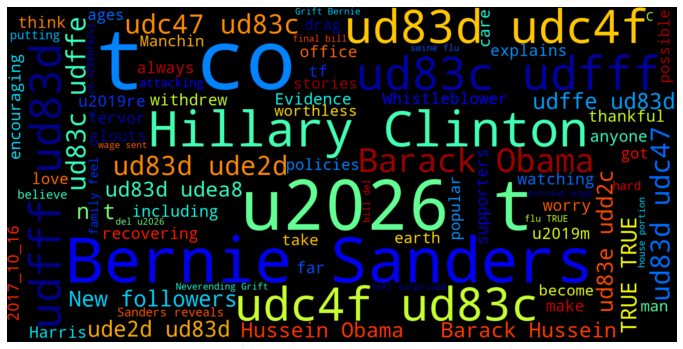

In [297]:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(combined_csv2['Tweets'])

In [ ]:
# We can see Unnecesiary Repeated Words, we can remove them for better Accuracy

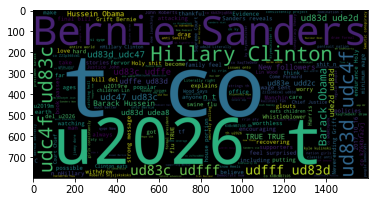

In [298]:
words = ' '.join([tweet for tweet in combined_csv2['Tweets']])
wordCloud = WordCloud(width=1600, height=800).generate(words)

plt.imshow(wordCloud)
plt.show()

In [299]:
combined_csv2['Sentiment'].value_counts()

Neutral     528
Positive    252
Negative    192
Name: Sentiment, dtype: int64

<AxesSubplot:title={'center':'Sentiment Analysis'}>

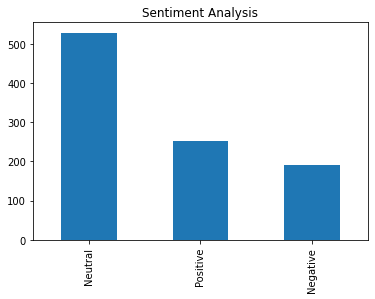

In [300]:
combined_csv2['Sentiment'].value_counts().plot(kind='bar',title="Sentiment Analysis")

# NLP

In [301]:
# importing the NLP(Natural Language Processing) library
#from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [302]:

new = combined_csv2.filter(['Tweets','compound','Sentiment'], axis=1)

In [303]:
new

,Tweets,compound,Sentiment
3,"""Bernie Sanders reveals that the family feel s...",-0.1779,Negative
7,"""TRUE TRUE TRUE""",0.7944,Positive
13,"""The Neverending Grift""",0.0000,Neutral
15,"""Bernie Sanders is including the $15 minimum w...",0.0000,Neutral
17,""" The book passes a strong message on endurance",0.5106,Positive
...,...,...,...
507,""" Your husband Barack Obama ruined this cou...",-0.6093,Negative
511,""" Hillary Clinton?""",0.0000,Neutral
513,"""With an account name like \""princess mom\"" it...",0.2732,Positive
527,""" Antagonist...antagonizer...= Bernie Sanders""",0.0000,Neutral


In [304]:
new[:2]

,Tweets,compound,Sentiment
3,"""Bernie Sanders reveals that the family feel s...",-0.1779,Negative
7,"""TRUE TRUE TRUE""",0.7944,Positive


In [305]:
new['Tweets'][:10]

3     "Bernie Sanders reveals that the family feel s...
7                                      "TRUE TRUE TRUE"
13                              "The Neverending Grift"
15    "Bernie Sanders is including the $15 minimum w...
17     "  The book passes a strong message on endurance
19     "Holy shit!\n\nHillary Clinton eats children!!!"
35    "Lin Wood Says a Whistleblower Has Come Forwar...
43    "Snjsjsksksks the fervor with which the pantsu...
49               "\ud83d\ude2d\ud83d\ude2d\ud83d\ude2d"
53    "    Literally right before she withdrew the n...
Name: Tweets, dtype: object

In [306]:
def tokenize(text):
    return word_tokenize(text)

def remove_stop_words(text):
    stop_words=stopwords.words('english')
    return([token.lower() for token in text if token not in stop_words])

def remove_punct(text):
    puncts = "~`!@#€$%^&*()_-+={[}]|\/:;'<,>.?/"
    return ([char for char in text if char not in puncts])

def stem_words(text):
    stemmer = WordNetLemmatizer()
    return ([stemmer.lemmatize(token) for token in text])

def stem_words_more(text):
    stemmer = PorterStemmer()
    return ([stemmer.stem(token) for token in text])

def cleaning_the_data(input):
    return_list = []
    for i in input:
        return_list.append(stem_words_more(stem_words(remove_punct(remove_stop_words(tokenize(i))))))
    return return_list

def Mummy(doc):
    return doc

#cleaning_the_data ="Hi how are you https://www.£4%^&*($djsdlkfui) thanking you and happyier"
#cleaning_the_data

In [307]:
x,y= new.Tweets, new.Sentiment

In [308]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 2)
print("X1-Train Shape: ", x_train.shape,'\n' "Y1-Train Shape:", y_train.shape)
print("X1-Test Shape: ", x_test.shape,'\n' "Y1-Test Shape:", y_test.shape)

X1-Train Shape:  (777,) 
Y1-Train Shape: (777,)
X1-Test Shape:  (195,) 
Y1-Test Shape: (195,)


In [309]:
#cleaning_the_data ="Hi how are you https://www.£4%^&*($djsdlkfui)"
#cleaning_the_data

In [310]:
x_train = cleaning_the_data(x_train)
x_test = cleaning_the_data(x_test)

In [428]:
#x_train[:10]

In [312]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word', tokenizer=Mummy, preprocessor=Mummy, token_pattern=None)
x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)
#x_train[:2]

# Model Building

# NAIVE BAYES

In [313]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, roc_auc_score

In [422]:
print('-'*70)
print('\t\t MultinomialNB')
print('-'*70)

model = MultinomialNB()

model.fit (x_train, y_train)

y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

----------------------------------------------------------------------
		 MultinomialNB
----------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        36
     Neutral       1.00      1.00      1.00       116
    Positive       1.00      1.00      1.00        43

    accuracy                           1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195



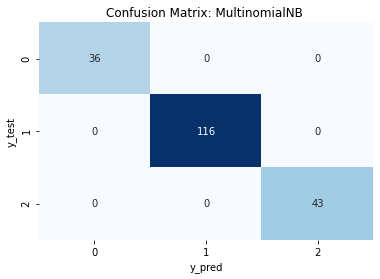

In [315]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm
sns.heatmap(cm,cbar=False,annot=True,cmap='Blues',fmt="d")
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Confusion Matrix: MultinomialNB ")
plt.show()

In [316]:
cm

,0,1,2
0,36,0,0
1,0,116,0
2,0,0,43


In [317]:
# Comparing with the Vader obtained Polarity(Positive/Negative/Neutral)

In [363]:
submission_result = pd.DataFrame({'tweet': x_test, 'Predicted_Sentiment':y_pred,'Actual_Sentiment': y_test})
submission_result

,tweet,Predicted_Sentiment,Actual_Sentiment
23751,"(0, 404)\t0.33170875564804975\n (0, 310)\t0...",Neutral,Neutral
11815,"(0, 404)\t0.33170875564804975\n (0, 310)\t0...",Neutral,Neutral
87,"(0, 404)\t0.33170875564804975\n (0, 310)\t0...",Neutral,Neutral
18127,"(0, 404)\t0.33170875564804975\n (0, 310)\t0...",Neutral,Neutral
5883,"(0, 404)\t0.33170875564804975\n (0, 310)\t0...",Positive,Positive
...,...,...,...
199,"(0, 404)\t0.33170875564804975\n (0, 310)\t0...",Neutral,Neutral
269,"(0, 404)\t0.33170875564804975\n (0, 310)\t0...",Neutral,Neutral
22863,"(0, 404)\t0.33170875564804975\n (0, 310)\t0...",Positive,Positive
637,"(0, 404)\t0.33170875564804975\n (0, 310)\t0...",Neutral,Neutral


In [319]:
# from this we can tell that the Predicted Model of the naive bayes is 100% Matched with the Actual Sentiment as the Vader tool

In [320]:
print("Accuracy Score", accuracy_score(y_test, y_pred))
print("Model Score: ", model.score(x_test, y_test))

Accuracy Score 1.0
Model Score:  1.0


C:\Users\user\anaconda3\envs\MLEnv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

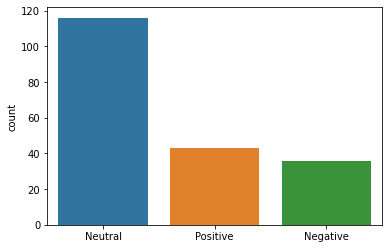

In [321]:

sns.countplot(y_pred)

# MultiLayer Perceptron Classifier 

In [345]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score#,model_score
from sklearn.metrics import mean_absolute_error,mean_squared_error ,r2_score

In [350]:
# Label Encoding 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_sentiment= le.fit_transform(new['Sentiment'])
#0-> Neutral
#1-> Negative
#2-> Positive

In [354]:
# Setting of Label Encoded variable
y1= new_sentiment
y1_train, y1_test = train_test_split(y1,test_size=0.20, shuffle= True)

In [355]:
#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
classifier.fit(x_train, y1_train)
MLP_y_pred = classifier.predict(x_test)

In [421]:

print('-'*70)
print('\t\t MLPClassifier')
print('-'*70)

#Comparing the predictions against the actual observations 
cm1 = confusion_matrix(y1_test, MLP_y_pred)
cm1
#Printing the accuracy
print ("Accuracy of MLPClassifier :",accuracy_score(y1_test, MLP_y_pred))
#print("Model Score: ", model_score(x_test, y_test))
print("R-Square value ",r2_score(y1_test, MLP_y_pred))
print("Classification Report: ", classification_report(y1_test, MLP_y_pred) )

----------------------------------------------------------------------
		 MLPClassifier
----------------------------------------------------------------------
Accuracy of MLPClassifier : 0.4512820512820513
R-Square value  -0.5811478525275557
Classification Report:                precision    recall  f1-score   support

           0       0.11      0.05      0.07        39
           1       0.55      0.69      0.61       114
           2       0.22      0.17      0.19        42

    accuracy                           0.45       195
   macro avg       0.29      0.30      0.29       195
weighted avg       0.39      0.45      0.41       195



In [364]:
submission_result1 = pd.DataFrame({'tweet': x_test, 'Predicted_Sentiment':MLP_y_pred,'Actual_Sentiment': y1_test})
submission_result1

,tweet,Predicted_Sentiment,Actual_Sentiment
0,"(0, 404)\t0.33170875564804975\n (0, 310)\t0...",1,2
1,"(0, 404)\t0.33170875564804975\n (0, 310)\t0...",2,0
2,"(0, 404)\t0.33170875564804975\n (0, 310)\t0...",1,0
3,"(0, 404)\t0.33170875564804975\n (0, 310)\t0...",2,0
4,"(0, 404)\t0.33170875564804975\n (0, 310)\t0...",0,1
...,...,...,...
190,"(0, 404)\t0.33170875564804975\n (0, 310)\t0...",2,1
191,"(0, 404)\t0.33170875564804975\n (0, 310)\t0...",1,2
192,"(0, 404)\t0.33170875564804975\n (0, 310)\t0...",1,1
193,"(0, 404)\t0.33170875564804975\n (0, 310)\t0...",1,1


In [ ]:
# from the Above we can say that the MLP performance is very Poor it has Accuracy has OF 45 %
#0-> Neutral
#1-> Negative
#2-> Positive
# A complete Difference and low Accuracy.

In [367]:
print("Accuracy Score", accuracy_score(y1_test, MLP_y_pred))


Accuracy Score 0.4512820512820513


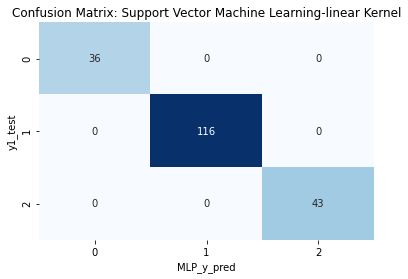

In [338]:
sns.heatmap(cm1,cbar=False,annot=True,cmap='Blues',fmt="d")
plt.xlabel("MLP_y_pred")
plt.ylabel("y1_test")
plt.title("Confusion Matrix: Support Vector Machine Learning-linear Kernel")
plt.show()

C:\Users\user\anaconda3\envs\MLEnv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

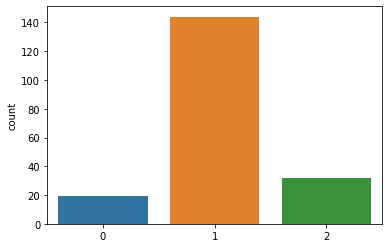

In [358]:
sns.countplot(MLP_y_pred)

In [ ]:
#0-> Neutral
#1-> Negative
#2-> Positive

# PERCEPTRON

In [360]:
from sklearn.linear_model import Perceptron

In [423]:
print('-'*70)
print('\t\t Perceptron')
print('-'*70)
nn = Perceptron()
nn.fit(x_train, y1_train)
nn_y_pred = nn.predict(x_test)
print(classification_report(y1_test, nn_y_pred))

----------------------------------------------------------------------
		 Perceptron
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.11      0.13      0.12        39
           1       0.56      0.51      0.53       114
           2       0.29      0.33      0.31        42

    accuracy                           0.39       195
   macro avg       0.32      0.32      0.32       195
weighted avg       0.41      0.39      0.40       195



In [368]:
print("Accuracy Score", accuracy_score(y1_test, nn_y_pred))

Accuracy Score 0.39487179487179486


In [369]:
submission_result2 = pd.DataFrame({'tweet': x_test, 'Predicted_Sentiment':nn_y_pred,'Actual_Sentiment': y1_test})
submission_result2

,tweet,Predicted_Sentiment,Actual_Sentiment
0,"(0, 404)\t0.33170875564804975\n (0, 310)\t0...",1,2
1,"(0, 404)\t0.33170875564804975\n (0, 310)\t0...",1,0
2,"(0, 404)\t0.33170875564804975\n (0, 310)\t0...",1,0
3,"(0, 404)\t0.33170875564804975\n (0, 310)\t0...",2,0
4,"(0, 404)\t0.33170875564804975\n (0, 310)\t0...",2,1
...,...,...,...
190,"(0, 404)\t0.33170875564804975\n (0, 310)\t0...",2,1
191,"(0, 404)\t0.33170875564804975\n (0, 310)\t0...",2,2
192,"(0, 404)\t0.33170875564804975\n (0, 310)\t0...",1,1
193,"(0, 404)\t0.33170875564804975\n (0, 310)\t0...",1,1


C:\Users\user\anaconda3\envs\MLEnv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

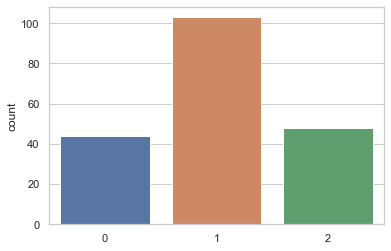

In [417]:
sns.countplot(nn_y_pred)

In [ ]:
#0-> Neutral
#1-> Negative
#2-> Positive

In [ ]:
# From this we can tell that the Accuracy is only 39% and we can look at  the actual vs the Predicted sentiment

In [410]:
final = pd.DataFrame({'MODELS': ["Naive Bayes","MLP-Classifier","Perceptron"],
'ACCURACY': [accuracy_score(y_test, y_pred),accuracy_score(y1_test, MLP_y_pred),accuracy_score(y1_test, nn_y_pred)] })

In [411]:
# Each Model Strength and Weakness 

end= final.sort_values(by='ACCURACY', ascending=False)
end_all = end.set_index('ACCURACY')
end_all

,MODELS
ACCURACY,
1.000000,Naive Bayes
0.451282,MLP-Classifier
0.394872,Perceptron


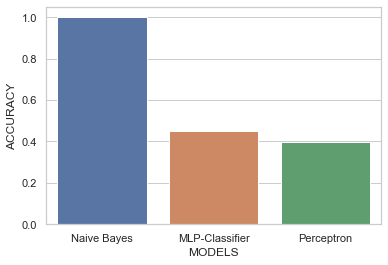

In [415]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(data = final, x="MODELS", y="ACCURACY")

In [ ]:
# From this Study we can understand abou the Vader Sentiment Tool and its Comparision with THE DESIGNED model 

In [ ]:
# Best Model with the exact prediction on compared with the Vader is Naive Bayes with 100% Acuraccy 
# other Models produce very Less Acuraccy